# CS 4820
# Lab 6: Convolving a Gray Scale Image

### Load a Gray Scale Image

In [1]:
# allow multiple outputs be displayed for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

First of all, let's load an example gray scale image from [`scipy.misc`](https://docs.scipy.org/doc/scipy/reference/misc.html):

In [2]:
from scipy import misc
import matplotlib.pyplot as plt

<Figure size 504x504 with 0 Axes>

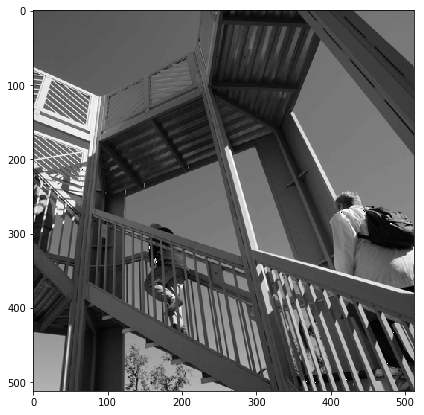

In [3]:
img = misc.ascent()

plt.figure(figsize=(7,7))
plt.imshow(img, cmap='gray')

In [4]:
img.shape

img_tensor = img.reshape((1, 512, 512, 1))

(512, 512)

$(N, H, W, C) = (1, 512, 512, 1)$

### One convolutional Layer

Convolutional layers are available in [`keras.layers.Conv2D`](https://keras.io/layers/convolutional/). Let's apply a convolutional layer to the image we loaded above and see what happens.

First, let's import the `Conv2D` layer from keras:

In [5]:
from tensorflow.keras.layers import Conv2D

$(H_f, W_f, C_i, C_o) = (11, 11, 1, 1)$

In [6]:
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(1, (11, 11), kernel_initializer='ones', input_shape=(512, 512, 1)))

model.compile('adam', 'mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 502, 502, 1)       122       
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


__Q: Why output shape = (None, 502, 502, 1)?__

A: 
- None is the number of output images. 
- 502 by 502 is the size of the output feature map. Will be further explained after discussing padding and stride.
- 1 is the number of output channels.

$$ Param \# = Weight \# + Theta \# = H_f * W_f * C_o * C_i + C_o = 11 * 11 * 1 * 1 + 1 = 122 $$

In [7]:
img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

(1, 502, 502, 1)

<Figure size 504x504 with 0 Axes>

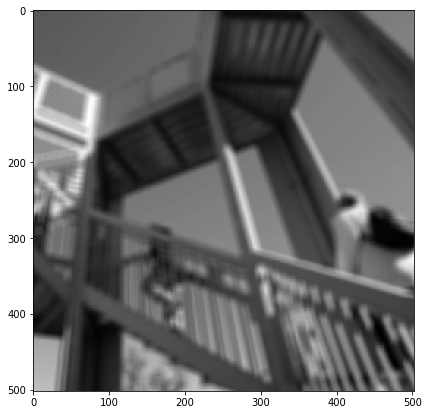

In [8]:
img_pred = img_pred_tensor[0, :, :, 0]

plt.figure(figsize=(7,7))
plt.imshow(img_pred, cmap='gray')

### Stacking Multiple Convolutional Layers

We can stack multiple convolutional layers to extract features from the original image that are not necessarily straight-forward for us human beings to comprehend/interpret.

In [9]:
model_2 = Sequential()

model_2.add(Conv2D(1, (11, 11), kernel_initializer='RandomNormal', input_shape=(512, 512, 1), activation='relu'))

model_2.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer='RandomNormal'))

model_2.add(Conv2D(2, (3, 3), activation='relu', kernel_initializer='RandomNormal'))

model_2.compile('adam', 'mse')

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 502, 502, 1)       122       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 498, 498, 4)       104       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 496, 496, 2)       74        
Total params: 300
Trainable params: 300
Non-trainable params: 0
_________________________________________________________________


__Q: Why output shape = (None, 498, 498, 4) from the second conv. layer?__

A: 
- None is the number of output images. 
- 498 by 498 is the size of the output feature map. Will be further explained after discussing padding and stride.
- 4 is the number of output channels.

$$ Param \# = Weight \# + Theta \# = H_f * W_f * C_o * C_i + C_o = 5 * 5 * 4 * 1 + 4 = 104 $$

__Q: Why output shape = (None, 496, 496, 2) from the third conv. layer?__

A: 
- None is the number of output images. 
- 496 by 496 is the size of the output feature map. Will be further explained after discussing padding and stride.
- 2 is the number of output channels.

$$ Param \# = Weight \# + Theta \# = H_f * W_f * C_o * C_i + C_o = 3 * 3 * 2 * 4 + 2 = 74 $$

In [10]:
img_pred_tensor_2 = model_2.predict(img_tensor)

img_pred_tensor_2.shape

(1, 496, 496, 2)

<Figure size 504x504 with 0 Axes>

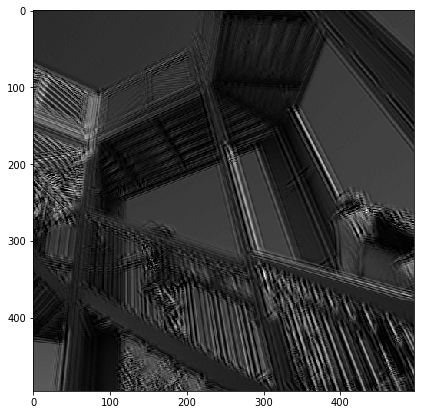

In [11]:
img_pred_2 = img_pred_tensor_2[0, :, :, 0]

plt.figure(figsize=(7,7))
plt.imshow(img_pred_2, cmap='gray')

<Figure size 504x504 with 0 Axes>

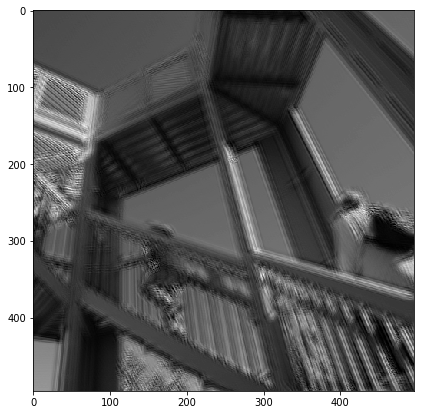

In [12]:
img_pred_3 = img_pred_tensor_2[0, :, :, 1]

plt.figure(figsize=(7,7))
plt.imshow(img_pred_3, cmap='gray')